# 词袋模型

In [16]:
# 导入数据
import pandas as pd
text_ana = pd.read_excel('text_analysis_weibo_sample.xlsx')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东
...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京
97,39598,接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...,0,0,0,NaN,0,0,北京


## 数据预处理

In [33]:
import re

def preprocess_text(text):
    # 转换为小写
    text = text.lower()   

    # # 移除URL
    # text = re.sub(r'http\S+', '', text)
    # # 移除特殊字符和数字
    # text = re.sub(r'[^a-zA-Z\s]', '', text)
    # # 移除多余的空格
    # text = re.sub(r'\s+', ' ', text).strip()
    # 移除停用词
    stop_words = set(['to', 'the', 'com', 'http', 'https'])
    # print(text)
    text = ' '.join([word for word in text.split() if word not in stop_words])  # 移除停用词      # 移除停用词
    # print(text)
    
    return text

In [35]:
text_ana["标题/微博内容"].apply(preprocess_text)

0     国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力合约跌0.3...
1                                         #喜迎二十大 忠诚保平安#
2     注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师资...
3     近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸”到“塔吊林立”，雄安新区地上、地下、...
4                                                樊振东牛逼！
                            ...                        
95                                            老公好漂亮[舔屏]
96    恭喜@张小娜呀娜 1名用户获得【小飞t】。c官方唯一抽奖工具@c抽奖平台 对本次抽奖进行监督...
97    接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...
98    目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-90%...
99                            你们家的小编真的很用心,关注不后悔[话筒][话筒]
Name: 标题/微博内容, Length: 100, dtype: object

In [36]:
# len(text_ana)
text_ana.shape

(100, 9)

## 构建词袋模型

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["标题/微博内容"].apply(preprocess_text))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out()[:100])

词袋特征矩阵的形状: (100, 5353)
特征词列表: ['00' '000713' '000998' '002041' '002385' '00召开新闻发布会'
 '00年天胶产业的整体需求很可能会逐渐好转' '01' '01元佣金开户的团购优惠' '01元开户政策'
 '01合约中期仍面临海外经济走弱导致纸浆需求下滑的风险' '01合约供需向好确定性增强' '01合约预期改善行业也有参与价值' '02'
 '02万吨' '02亿元' '02亿美元' '03' '03万吨' '03美元或2' '04万吨' '04个百分点' '04亿元' '05万吨'
 '05亿元' '05亿元的生产总值' '06' '061' '06万吨' '07' '07万吨' '07亿元' '08' '081吨'
 '08合约上方压力位20000' '09万吨' '09合约周四上涨' '09合约基差修复行情较为确定' '09合约技术面12000暂时有压制'
 '09合约涨1' '09合约涨2' '09合约跟随玉米窄幅震荡' '0l' '0mm价格' '0万吨' '0交易制度' '0佣金0手续费0元开户'
 '0附近做空' '10' '100' '100万及以上6' '10180元' '10510元' '10685元之间波动' '10万吨左右'
 '10年前' '10年期主力合约跌0' '10年期国债收益率均跌超30基点' '10月4日' '10月cpi环比上涨0'
 '10月份的通胀报告可能会使美联储按计划于下个月加息50基点' '10月整体cpi同比涨幅从9月份的8' '11' '110' '1100'
 '112' '11724亿桶' '1189年' '11万吨' '11亿元' '11月11日' '11月cpi环比放缓0'
 '11月以来国内防疫和地产政策利好频出' '11月德国通胀环比和同比增速均低于前值' '11省上半年完成重点项目投资超4' '12'
 '1200万吨' '120日多周期均线附近承压回落' '12245元之间波动' '12750位置' '12万吨' '12个月'
 '12辆汽车将绕爪哇岛行驶5万公里' '13' '130亿元可转债发行工作' '13817426131' '13亿元' '14' '14万手'
 '14日查看申请结果' '15' '15200' '1

In [38]:
len(vectorizer.get_feature_names_out())

5353

In [39]:
X

<100x5353 sparse matrix of type '<class 'numpy.int64'>'
	with 5538 stored elements in Compressed Sparse Row format>

In [23]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dt

## 词频统计

In [40]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()
feature_words.shape

(5353,)

In [41]:
X.sum(axis=0).A1

array([4, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
list(zip(feature_words, X.sum(axis=0).A1))

[('00', 4),
 ('000713', 1),
 ('000998', 1),
 ('002041', 1),
 ('002385', 1),
 ('00召开新闻发布会', 1),
 ('00年天胶产业的整体需求很可能会逐渐好转', 1),
 ('01', 4),
 ('01元佣金开户的团购优惠', 1),
 ('01元开户政策', 1),
 ('01合约中期仍面临海外经济走弱导致纸浆需求下滑的风险', 1),
 ('01合约供需向好确定性增强', 1),
 ('01合约预期改善行业也有参与价值', 1),
 ('02', 1),
 ('02万吨', 1),
 ('02亿元', 1),
 ('02亿美元', 1),
 ('03', 1),
 ('03万吨', 2),
 ('03美元或2', 1),
 ('04万吨', 1),
 ('04个百分点', 1),
 ('04亿元', 1),
 ('05万吨', 1),
 ('05亿元', 2),
 ('05亿元的生产总值', 1),
 ('06', 2),
 ('061', 1),
 ('06万吨', 1),
 ('07', 3),
 ('07万吨', 1),
 ('07亿元', 1),
 ('08', 2),
 ('081吨', 1),
 ('08合约上方压力位20000', 1),
 ('09万吨', 1),
 ('09合约周四上涨', 2),
 ('09合约基差修复行情较为确定', 1),
 ('09合约技术面12000暂时有压制', 1),
 ('09合约涨1', 1),
 ('09合约涨2', 1),
 ('09合约跟随玉米窄幅震荡', 1),
 ('0l', 1),
 ('0mm价格', 2),
 ('0万吨', 1),
 ('0交易制度', 1),
 ('0佣金0手续费0元开户', 1),
 ('0附近做空', 1),
 ('10', 5),
 ('100', 4),
 ('100万及以上6', 1),
 ('10180元', 1),
 ('10510元', 1),
 ('10685元之间波动', 1),
 ('10万吨左右', 1),
 ('10年前', 1),
 ('10年期主力合约跌0', 1),
 ('10年期国债收益率均跌超30基点', 1),
 ('10月4日', 1),
 ('10月cp

In [43]:
# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))
word_freq

{'00': 4,
 '000713': 1,
 '000998': 1,
 '002041': 1,
 '002385': 1,
 '00召开新闻发布会': 1,
 '00年天胶产业的整体需求很可能会逐渐好转': 1,
 '01': 4,
 '01元佣金开户的团购优惠': 1,
 '01元开户政策': 1,
 '01合约中期仍面临海外经济走弱导致纸浆需求下滑的风险': 1,
 '01合约供需向好确定性增强': 1,
 '01合约预期改善行业也有参与价值': 1,
 '02': 1,
 '02万吨': 1,
 '02亿元': 1,
 '02亿美元': 1,
 '03': 1,
 '03万吨': 2,
 '03美元或2': 1,
 '04万吨': 1,
 '04个百分点': 1,
 '04亿元': 1,
 '05万吨': 1,
 '05亿元': 2,
 '05亿元的生产总值': 1,
 '06': 2,
 '061': 1,
 '06万吨': 1,
 '07': 3,
 '07万吨': 1,
 '07亿元': 1,
 '08': 2,
 '081吨': 1,
 '08合约上方压力位20000': 1,
 '09万吨': 1,
 '09合约周四上涨': 2,
 '09合约基差修复行情较为确定': 1,
 '09合约技术面12000暂时有压制': 1,
 '09合约涨1': 1,
 '09合约涨2': 1,
 '09合约跟随玉米窄幅震荡': 1,
 '0l': 1,
 '0mm价格': 2,
 '0万吨': 1,
 '0交易制度': 1,
 '0佣金0手续费0元开户': 1,
 '0附近做空': 1,
 '10': 5,
 '100': 4,
 '100万及以上6': 1,
 '10180元': 1,
 '10510元': 1,
 '10685元之间波动': 1,
 '10万吨左右': 1,
 '10年前': 1,
 '10年期主力合约跌0': 1,
 '10年期国债收益率均跌超30基点': 1,
 '10月4日': 1,
 '10月cpi环比上涨0': 1,
 '10月份的通胀报告可能会使美联储按计划于下个月加息50基点': 1,
 '10月整体cpi同比涨幅从9月份的8': 1,
 '11': 11,
 '110': 1,
 '1100': 1,
 '112': 1,

In [44]:
word_freq.items()

dict_items([('00', 4), ('000713', 1), ('000998', 1), ('002041', 1), ('002385', 1), ('00召开新闻发布会', 1), ('00年天胶产业的整体需求很可能会逐渐好转', 1), ('01', 4), ('01元佣金开户的团购优惠', 1), ('01元开户政策', 1), ('01合约中期仍面临海外经济走弱导致纸浆需求下滑的风险', 1), ('01合约供需向好确定性增强', 1), ('01合约预期改善行业也有参与价值', 1), ('02', 1), ('02万吨', 1), ('02亿元', 1), ('02亿美元', 1), ('03', 1), ('03万吨', 2), ('03美元或2', 1), ('04万吨', 1), ('04个百分点', 1), ('04亿元', 1), ('05万吨', 1), ('05亿元', 2), ('05亿元的生产总值', 1), ('06', 2), ('061', 1), ('06万吨', 1), ('07', 3), ('07万吨', 1), ('07亿元', 1), ('08', 2), ('081吨', 1), ('08合约上方压力位20000', 1), ('09万吨', 1), ('09合约周四上涨', 2), ('09合约基差修复行情较为确定', 1), ('09合约技术面12000暂时有压制', 1), ('09合约涨1', 1), ('09合约涨2', 1), ('09合约跟随玉米窄幅震荡', 1), ('0l', 1), ('0mm价格', 2), ('0万吨', 1), ('0交易制度', 1), ('0佣金0手续费0元开户', 1), ('0附近做空', 1), ('10', 5), ('100', 4), ('100万及以上6', 1), ('10180元', 1), ('10510元', 1), ('10685元之间波动', 1), ('10万吨左右', 1), ('10年前', 1), ('10年期主力合约跌0', 1), ('10年期国债收益率均跌超30基点', 1), ('10月4日', 1), ('10月cpi环比上涨0', 1), ('10月份的通胀报告可能会使美联储按计划于下个月加息50基点', 1

In [45]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('行情复盘', 35),
 ('交易策略', 33),
 ('重要资讯', 33),
 ('期货市场', 15),
 ('现货市场', 12),
 ('11', 11),
 ('cn', 11),
 ('7月28日', 9),
 ('http', 9),
 ('需求方面', 9),
 ('25', 8),
 ('50', 8),
 ('8万吨', 8),
 ('库存方面', 8),
 ('38', 7),
 ('周四', 7),
 ('符合市场预期', 7),
 ('1万吨', 6),
 ('数据显示', 6),
 ('现货方面', 6),
 ('盎司', 6),
 ('10', 5),
 ('30', 5),
 ('34', 5),
 ('37', 5),
 ('40', 5),
 ('doge', 5),
 ('ftx', 5),
 ('上海', 5),
 ('中国', 5),
 ('主力', 5),
 ('其中', 5),
 ('刘雨昕', 5),
 ('十四五', 5),
 ('千克', 5),
 ('同时', 5),
 ('操作建议', 5),
 ('新基建', 5),
 ('无锡', 5),
 ('概念题材', 5),
 ('美联储加息', 5),
 ('超话', 5),
 ('重庆', 5),
 ('00', 4),
 ('01', 4),
 ('100', 4),
 ('16', 4),
 ('19', 4),
 ('2021', 4),
 ('2021年', 4),
 ('2023年', 4),
 ('22', 4),
 ('24', 4),
 ('29', 4),
 ('46', 4),
 ('4万吨', 4),
 ('4万桶', 4),
 ('5g', 4),
 ('75', 4),
 ('7月27日', 4),
 ('90', 4),
 ('9万吨', 4),
 ('今年上半年', 4),
 ('供应端', 4),
 ('北京', 4),
 ('回复', 4),
 ('工业互联网', 4),
 ('截至2021年底', 4),
 ('截至2021年末', 4),
 ('截至7月22日', 4),
 ('报告显示', 4),
 ('持平', 4),
 ('日线上', 4),
 ('显示', 4),
 ('来源', 4),
 ('此外', 4

## 词云图

In [31]:
# pip install wordcloud

   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---


[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


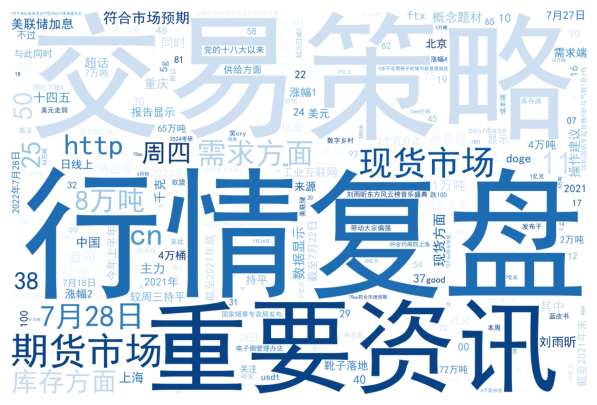

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 根据词袋模型分析结果绘制词云图（支持中文）
wc = WordCloud(
    width=1200, height=800,
    max_words=200,
    colormap='Blues',
    background_color='white',
    font_path='C:/Windows/Fonts/simhei.ttf'  # Windows下的黑体字体路径

).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')
plt.show()
